# ML CYCLE FOR THE CLASSIFICATION TASK

# Data Science Method Overview
The Data Science Method (DSM) is the process you'll follow to complete projects and case studies throughout this course — and should be applied throughout your career. This method involves six steps:

1-Problem identification
2-Data wrangling:
2.1-data collection(import file)
2.2-data organisation(git or cookies cutter)
2.3 data definition(pandas prfoiling)
2.4 data cleaning
-Learn how to acquire and compile data through data collection
Develop the skills to keep projects organized by building local file structures and keeping GitHub repo versions updated 
Learn how to review data types, build data profiles, and begin to develop an understanding of the feature dimensions of your data
Be able to handle problems in your data such as null values, duplicates, and formatting issues
3-Exploratory data analysis 
Pre-processing and training data development
Modeling
Documentation

1-1. Data Collection
-type of data, time series, numerical ,categorical, mix

2-2. Data preparation
EDA:
    
-Finding the type of columns, 
rename the columns,
manage missing value, 
drop dupicate row, droping irrelevant columns,dropping missing or nul value, 
varibale trasnformation,
detecting outliers, 
create a new features.

Data preprocessing, preparing your data to be modelled:
     Feature imputation: filling missing values ( a machine learning model can’t learn
on data that’s isn’t there)
Single imputation: Fill with mean, a median of the column.
Multiple imputations: Model other missing values and with what your model finds.
KNN (k-nearest neighbors): Fill data with a value from another example that is similar.
Many more, such as random imputation, last observation carried forward (for time series), moving window, and most frequent.

One hot encoding: Turn all unique values into lists of 0’s and 1’s where the target value is 1 and the rest are 0’s.
For example, when a car colors green, red blue, a green, a car’s color future would be represented as [1, 0, and 0]
and a red one would be [0, 1, and 0].

Label Encoder: Turn labels into distinct numerical values. For example, if your target variables are different animals, 
such as dog, cat, bird, these could become 0, 1, and 2, respectively.

Feature normalization (scaling) or standardization:
    
Feature selection: 
    1-Dimensionality reduction:
    2-Feature importance (post modelling): 
    
    
Dealing with imbalances:
-Collect more data (if you can)
-Use the scikit-learn-contrib imbalanced- learn package
-Use SMOTE: synthetic minority over-sampling technique. 
        It creates synthetic samples of your minor class to try and level the playing field.
        
Data splitting:
    80/20 ration
3. Train model on data( 3 steps: Choose an algorithm, overfit the model, reduce overfitting with regularization)


 Supervised algorithms – Linear Regression, Logistic Regression, KNN, SVMs, Decision tree and Random forests, AdaBoost/Gradient Boosting Machine(boosting)
 Unsupervised algorithms- Clustering, dimensionality reduction( PCA, Autoencoders, t-SNE), An anomaly detection.

 Type of learning :
        
 Batch learning
 Online learning
 Transfer learning
 Active learning
 Ensembling

 Underfitting – happens when your model doesn’t perform as well as you’d like on your data. 
    Try training for a longer or more advanced model.
Overfitting– happens when your validation loss starts to increase or when the model performs better on the training set than on the test set.

Regularization: a collection of technologies to prevent/reduce overfitting (e.g. L1, L2, Dropout, Early stopping, Data augmentation, Batch normalization)
Hyperparameter Tuning –  run a bunch of experiments with different settings and see which works best.

4. Analysis/Evaluation
Evaluation metrics
Classification- Accuracy, Precision, Recall, F1, Confusion matrix, Mean average precision (object detection)
 Regression – MSE,MAE,R^2
Task-based metric – E.g. for the self-driving car, you might want to know the number of disengagements



classification models:
    1-class lables:
        balanced dataset:
            1-confusion marix
            2-type-1 error
            3- type-2 error
            4- accurcay
        imbalanced dataset:
            1-confusion marix
            2-f1-score
            2-type-1 error
            3- type-2 error
            4- recall
            5-precision
    2-probabiltities:
        1-confusion matrix
        2-roc auc curve
        3-PR curve

# 2.Handling Outliers

In [ ]:
Before mentioning how outliers can be handled, 
I want to state that the best way to detect the outliers is to demonstrate the data visually. 
All other statistical methodologies are open to making mistakes, 
whereas visualizing the outliers gives a chance to take a decision with high precision.

Outlier Detection with Standard Deviation
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['column'].mean () + data['column'].std () * factor
lower_lim = data['column'].mean () - data['column'].std () * factor

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

Outlier Detection with Percentiles

#Dropping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]



# 3.Binning

In [ ]:
Binning can be applied on both categorical and numerical data:
    
    #Numerical Binning Example
Value      Bin       
0-30   ->  Low       
31-70  ->  Mid       
71-100 ->  High
#Categorical Binning Example
Value      Bin       
Spain  ->  Europe      
Italy  ->  Europe       
Chile  ->  South America
Brazil ->  South America

The main motivation of binning is to make the model more robust and prevent overfitting, 
however, it has a cost to the performance.

#Numerical Binning Example
data['bin'] = pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])
   value   bin
0      2   Low
1     45   Mid
2      7   Low
3     85  High
4     28   Low
#Categorical Binning Example
     Country
0      Spain
1      Chile
2  Australia
3      Italy
4     Brazil
conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'),
    data['Country'].str.contains('Chile'),
    data['Country'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')
     Country      Continent
0      Spain         Europe
1      Chile  South America
2  Australia          Other
3      Italy         Europe
4     Brazil  South America

# 4.Log Transform

In [ ]:
Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering.
What are the benefits of log transform:
It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
In most of the cases the magnitude order of the data changes within the range of the data. 
For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. 
In terms of years, yes, they are identical, 
but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference.
This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.
It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

A critical note: The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.
Log(x+1)
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
   value  log(x+1)  log(x-min(x)+1)
0      2   1.09861          3.25810
1     45   3.82864          4.23411
2    -23       nan          0.00000
3     85   4.45435          4.69135
4     28   3.36730          3.95124
5      2   1.09861          3.25810
6     35   3.58352          4.07754
7    -12       nan          2.48491

# 5.One-hot encoding

In [ ]:
One-hot encoding is one of the most common encoding methods in machine learning. 
This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them.

Why One-Hot?: If you have N distinct values in the column, it is enough to map them to N-1 binary columns,
    because the missing value can be deducted from other columns. 
    If all the columns in our hand are equal to 0, the missing value must be equal to 1. 
    This is the reason why it is called as one-hot encoding.
    However, I will give an example using the get_dummies function of Pandas. 
    This function maps all values in a column to multiple columns.
    
    encoded_columns = pd.get_dummies(data['column'])
data = data.join(encoded_columns).drop('column', axis=1)

# 6.Grouping Operations

In [ ]:
In most machine learning algorithms, every instance is represented by a row in the training dataset, 
where every column show a different feature of the instance. This kind of data called “Tidy”


The key point of group by operations is to decide the aggregation functions of the features. 
For numerical features, average and sum functions are usually convenient options,
whereas for categorical features it more complicated.
Categorical Column Grouping
I suggest three different ways for aggregating categorical columns:
The first option is to select the label with the highest frequency. 
In other words, this is the max operation for categorical columns,
but ordinary max functions generally do not return this value, you need to use a lambda function for this purpose.
data.groupby('id').agg(lambda x: x.value_counts().index[0])
Second option is to make a pivot table. This approach resembles the encoding method in the preceding step with a difference. 
Instead of binary notation, it can be defined as aggregated functions for the values between grouped and encoded columns. 
This would be a good option if you aim to go beyond binary flag columns and merge multiple features into aggregated features,
which are more informative.


#Pivot table Pandas Example
data.pivot_table(index='column_to_group', columns='column_to_encode', values='aggregation_column', aggfunc=np.sum, fill_value = 0)

Numerical Column Grouping
Numerical columns are grouped using sum and mean functions in most of the cases. Both can be preferable according to the meaning of the feature. For example, if you want to obtain ratio columns, you can use the average of binary columns. In the same example, sum function can be used to obtain the total count either.
#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = data.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)

# 7.Feature Split

In [ ]:
Splitting features is a good way to make them useful in terms of machine learning. 
Most of the time the dataset contains string columns that violates tidy data principles.

#String extraction example
data.title.head()
0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
data.title.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]
0    1995
1    1995
2    1995
3    1995
4    1995

# 8.Scaling

In [ ]:
Normalization

Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1. 

data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
   value  normalized
0      2        0.23
1     45        0.63
2    -23        0.00
3     85        1.00
4     28        0.47
5      2        0.23
6     35        0.54
7    -12        0.10

Standardization
Standardization (or z-score normalization) scales the values while taking into account standard deviation. 
If the standard deviation of features is different, their range also would differ from each other. 
This reduces the effect of the outliers in the features.
In the following formula of standardization, the mean is shown as μ and the standard deviation is shown as σ.

data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
   value  standardized
0      2         -0.52
1     45          0.70
2    -23         -1.23
3     85          1.84
4     28          0.22
5      2         -0.52
6     35          0.42
7    -12         -0.92



# 9.Extracting Date

In [ ]:
Though date columns usually provide valuable information about the model target, 
they are neglected as an input or used nonsensically for the machine learning algorithms. 
It might be the reason for this, that dates can be present in numerous formats, 
which make it hard to understand by algorithms, even they are simplified to a format like "01–01–2017".
Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation.
Here, I suggest three types of preprocessing for dates:
Extracting the parts of the date into different columns: Year, month, day, etc.
Extracting the time period between the current date and columns in terms of years, months, days, etc.
Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.
    
    from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()
        date  year  month  passed_years  passed_months   day_name
0 2017-01-01  2017      1             2             26     Sunday
1 2008-12-04  2008     12            11            123   Thursday
2 1988-06-23  1988      6            31            369   Thursday
3 1999-08-25  1999      8            20            235  Wednesday
4 1993-02-20  1993      2            26            313   Saturday

List of Techniques
1.Imputation
2.Handling Outliers
3.Binning
4.Log Transform
5.One-Hot Encoding
6.Grouping Operations
7.Feature Split
8.Scaling
9.Extracting Date


##1.Imputation

The most simple solution to the missing values is to drop the rows or the entire column. 
There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]


Numerical Imputation
Imputation is a more preferable option rather than dropping because it preserves the data size. 
However, there is an important selection of what you impute to the missing values. 
I suggest beginning with considering a possible default value of missing values in the column. 
For example, if you have a column that only has 1 and NA, then it is likely that the NA rows correspond to 0. 
For another example, if you have a column that shows the “customer visit count in last month”, 
the missing values might be replaced with 0 as long as you think it is a sensible solution.
Another reason for the missing values is joining tables with different sizes and in this case, imputing 0 might be reasonable as well.
Except for the case of having a default value for missing values, I think the best imputation way is to use the medians of the columns. 
As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.
#Filling all missing values with 0
data = data.fillna(0)
#Filling missing values with medians of the columns
data = data.fillna(data.median())

Categorical Imputation
#Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts()
.idxmax(), inplace=True)

In [2]:
# import neccessary librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#loading of the data
df=pd.read_table("fruit_data_with_colors.txt")

In [4]:
df.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
df.shape

(59, 7)

In [7]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [8]:
df.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [10]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [11]:
#The data is pretty balanced except mandarin. We will just have to go with it.
print(df.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


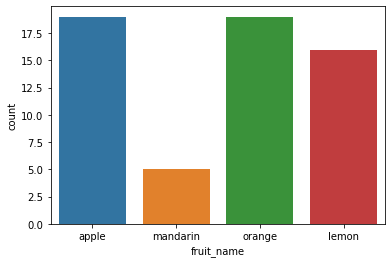

In [12]:
import seaborn as sns
sns.countplot(df['fruit_name'],label="Count")
plt.show()

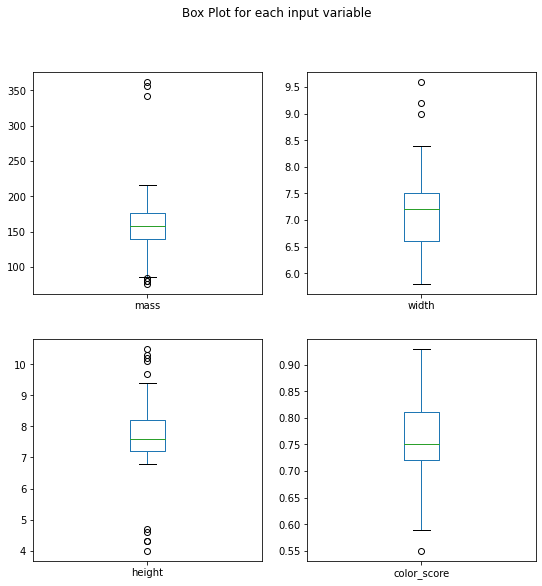

In [13]:
#Visualization
#Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:
df.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

In [ ]:
# sns.swarmplot(x='day', y='tip', data=tips, hue='sex') 
# In [14]: plt.ylabel('tip ($)') 
# In [15]: plt.show()

In [ ]:
# sns.violinplot(x='day', y='tip', data=tips, inner=None,      ...:                color='lightgray') 
# In [28]: sns.stripplot(x='day', y='tip', data=tips, size=4,      ...:               jitter=True) 
# In [29]: plt.ylabel('tip ($)') 
# In [30]: plt.show()

It looks like perhaps color score has a near Gaussian distribution.

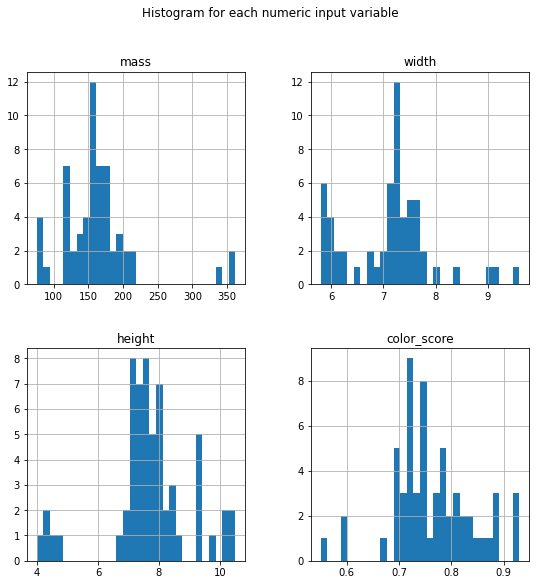

In [14]:
df.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

In [19]:
f=df.corr()
f

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


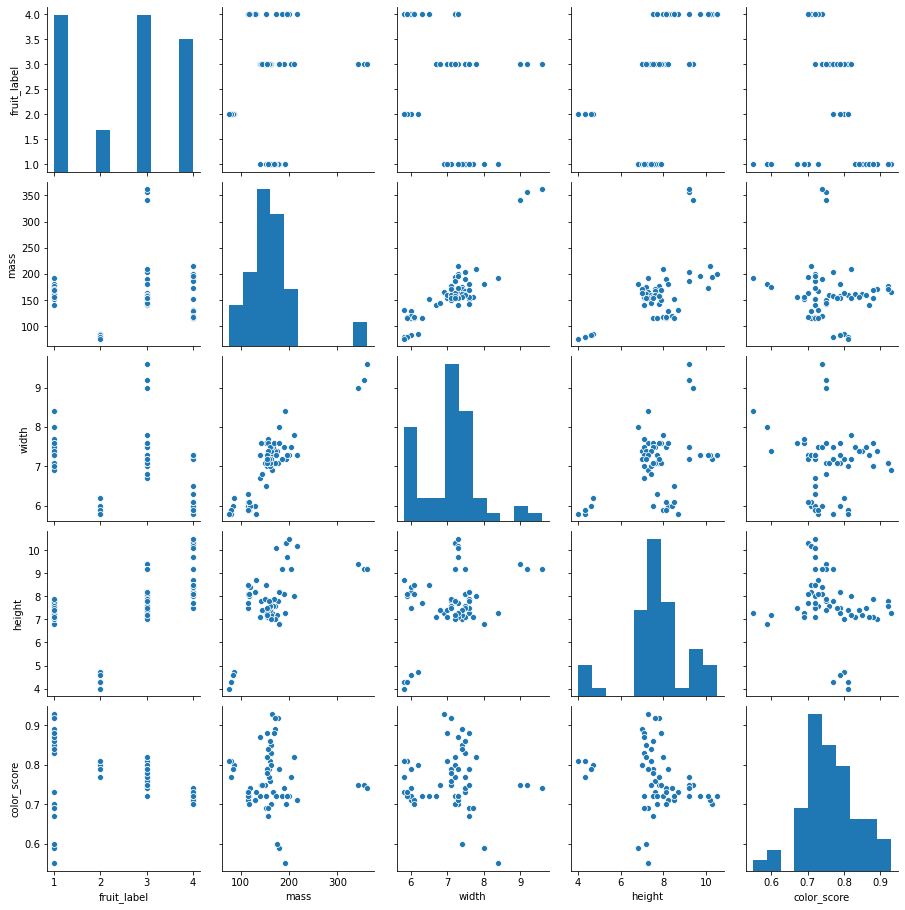

In [20]:
# sns.pairplot(tips, hue='sex') 
# plt.show()
sns.pairplot(df)

In [ ]:
# sns.heatmap(covariance) 
# plt.title('Covariance plot') 
# plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [23]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

# Create Training and Test Sets and Apply Scaling

In [25]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Models
Logistic Regression

In [26]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


# K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


# Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE test MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE test MODEL:  0.8


# Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


# Support Vector Machine

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# pandas prfoiling

In [37]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [38]:
profile